<a href="https://colab.research.google.com/github/Maksimka9/clustering-diploma-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задачи:

1. Пороговое значение - больше половины
2. Разметить все кластеры, взяв за начальные значения первый семестр
3. Применить модель прогнозирования кол-ва студентов
---
Алгоритм:

-Взять первый семестр за изначальные значения

-Для каждого кластера найти такой, в который он перешел больше чем на половину

-Остальным дать новые номера


Проблема: Кластер получен из двух больших частей других кластеров.

Решение: Отметить тем номером, элементов которого больше

In [1]:
# Подключение модулей (библиотек)

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Загрузка данных по семестрам

sem_1_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_1.csv?raw=true"
sem_2_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_2.csv?raw=true"
sem_3_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_3.csv?raw=true"
sem_4_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_4.csv?raw=true"
sem_5_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_5.csv?raw=true"
sem_6_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_6.csv?raw=true"
sem_7_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_7.csv?raw=true"
sem_8_data = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_8.csv?raw=true"

df_sem_1 = pd.read_csv(sem_1_data, index_col=False)
df_sem_2 = pd.read_csv(sem_2_data, index_col=False)
df_sem_3 = pd.read_csv(sem_3_data, index_col=False)
df_sem_4 = pd.read_csv(sem_4_data, index_col=False)
df_sem_5 = pd.read_csv(sem_5_data, index_col=False)
df_sem_6 = pd.read_csv(sem_6_data, index_col=False)
df_sem_7 = pd.read_csv(sem_7_data, index_col=False)
df_sem_8 = pd.read_csv(sem_8_data, index_col=False)

In [3]:
# Вспомогательная таблица для сопоставления меток класса с хэш-номером студентов

hash_df_1 = df_sem_1[['hash']]
hash_df_2 = df_sem_2[['hash']]
hash_df_3 = df_sem_3[['hash']]
hash_df_4 = df_sem_4[['hash']]
hash_df_5 = df_sem_5[['hash']]
hash_df_6 = df_sem_6[['hash']]
hash_df_7 = df_sem_7[['hash']]
hash_df_8 = df_sem_8[['hash']]

In [4]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_data_1 = StandardScaler().fit_transform(df_sem_1.iloc[:,1:])
standart_data_2 = StandardScaler().fit_transform(df_sem_2.iloc[:,1:])
standart_data_3 = StandardScaler().fit_transform(df_sem_3.iloc[:,1:])
standart_data_4 = StandardScaler().fit_transform(df_sem_4.iloc[:,1:])
standart_data_5 = StandardScaler().fit_transform(df_sem_5.iloc[:,1:])
standart_data_6 = StandardScaler().fit_transform(df_sem_6.iloc[:,1:])
standart_data_7 = StandardScaler().fit_transform(df_sem_7.iloc[:,1:])
standart_data_8 = StandardScaler().fit_transform(df_sem_8.iloc[:,1:])

standart_data_list = [standart_data_1, standart_data_2, standart_data_3, standart_data_4, 
                    standart_data_5, standart_data_6, standart_data_7, standart_data_8]


In [5]:
# Применяем PCA к кластеризованным данным

# Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df_1 = PCA(n_components=2).fit_transform(standart_data_1)
reduced_df_2 = PCA(n_components=2).fit_transform(standart_data_2)
reduced_df_3 = PCA(n_components=2).fit_transform(standart_data_3)
reduced_df_4 = PCA(n_components=2).fit_transform(standart_data_4)
reduced_df_5 = PCA(n_components=2).fit_transform(standart_data_5)
reduced_df_6 = PCA(n_components=2).fit_transform(standart_data_6)
reduced_df_7 = PCA(n_components=2).fit_transform(standart_data_7)
reduced_df_8 = PCA(n_components=2).fit_transform(standart_data_8)

# Превращаем результаты обратно в удобный вид
reduced_df_1 = pd.DataFrame(reduced_df_1) 
reduced_df_2 = pd.DataFrame(reduced_df_2)
reduced_df_3 = pd.DataFrame(reduced_df_3)
reduced_df_4 = pd.DataFrame(reduced_df_4)
reduced_df_5 = pd.DataFrame(reduced_df_5)
reduced_df_6 = pd.DataFrame(reduced_df_6)
reduced_df_7 = pd.DataFrame(reduced_df_7)
reduced_df_8 = pd.DataFrame(reduced_df_8)

reduced_df_list = [reduced_df_1, reduced_df_2, reduced_df_3, reduced_df_4,
                   reduced_df_5, reduced_df_6, reduced_df_7, reduced_df_8]


In [ ]:
# Подсчёт метрик качества кластеризации, чтобы понять насколько хорошо была проведена кластеризация.


# Создание словаря для значений метрик по каждому кластеру
silhouette_dict = {}
calinski_score_dict = {}
davies_score_dict = {}


n = 1 # Значение нужно для вывода графиков

for table in standart_data_list:
  for k in range(2, 35):
    agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=k) # Создаём экземпляр класса, где указываем кол-во кластеров
    clusters = agglom_clustering.fit_predict(table) # Вычисляем к какому элементу отнести каждый кластер

    # Запись данных во вспомогательный словарь
    transfer_list_silhouette = {k: sklearn.metrics.silhouette_score(table, clusters)}
    transfer_list_calinski = {k: sklearn.metrics.calinski_harabasz_score(table, clusters)}
    transfer_list_davies = {k: sklearn.metrics.davies_bouldin_score(table, clusters)}
    # Перенос данных в главные словари
    silhouette_dict.update(transfer_list_silhouette)
    calinski_score_dict.update(transfer_list_calinski)
    davies_score_dict.update(transfer_list_davies)
    # Удаление вспомогательных словарей
    del(transfer_list_silhouette)
    del(transfer_list_calinski)
    del(transfer_list_davies)
  

  # Создание pandas dataframe из словарей
  silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 
  calinski_df = pd.DataFrame.from_dict(calinski_score_dict, orient='index')
  davies_df = pd.DataFrame.from_dict(davies_score_dict, orient='index')


  plt.figure(figsize=(18, 23))

  # Вывод графиков метрик по всем семестрам
  plt.subplot(8, 3, n)
  plt.plot(silhouette_df.index, silhouette_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Коэффициент силуэта')
  plt.subplot(8, 3, n+1)
  plt.plot(calinski_df.index, calinski_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Калински-Харабаза')
  plt.subplot(8, 3, n+2)
  plt.plot(davies_df.index, davies_df[0])
  plt.xlabel('Количество кластеров')
  plt.ylabel('Значение метрики')
  plt.title('Метрика Дэвиса-Боулдина')
  n += 3


In [6]:
# Проведение финальной кластеризации дл фиксированного кол-ва кластеров по каждому семестру

processed_df_list = []
processed_df_dict = {'processed_df_1':15, 'processed_df_2':8, 'processed_df_3':10, 'processed_df_4':5,
                     'processed_df_5':12, 'processed_df_6':18, 'processed_df_7':17, 'processed_df_8':8}


# Вычисление кластера для каждого элемента

for key in processed_df_dict.keys():
  agglom_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters = processed_df_dict[key])
  processed_df = agglom_clustering.fit_predict(standart_data_list[int(key[-1])-1]) 
  processed_df_list.append(processed_df)

# Превращение NumPy array (в данном случае вектор) в pandas DataFrame
labels_df_1 = pd.DataFrame(processed_df_list[0], columns = ['labels'])
labels_df_2 = pd.DataFrame(processed_df_list[1], columns = ['labels'])
labels_df_3 = pd.DataFrame(processed_df_list[2], columns = ['labels'])
labels_df_4 = pd.DataFrame(processed_df_list[3], columns = ['labels']) 
labels_df_5 = pd.DataFrame(processed_df_list[4], columns = ['labels'])
labels_df_6 = pd.DataFrame(processed_df_list[5], columns = ['labels'])
labels_df_7 = pd.DataFrame(processed_df_list[6], columns = ['labels'])
labels_df_8 = pd.DataFrame(processed_df_list[7], columns = ['labels'])


In [ ]:
# Отображение набора данных, используя разные цвета для разных кластеров

n = 1

for number in range(0, len(processed_df_list)):
  plt.figure(figsize=(21, 28))
  graph = plt.subplot(4, 2, 1)
  graph.scatter(reduced_df_list[number][0], reduced_df_list[number][1], c = processed_df_list[number], s=10) # с - используемые цвета
  plt.xlabel('1-ая компонента')
  plt.ylabel('2-ая компонента')
  graph.set_title('семестр №'+str(n))
  n+=1
  plt.show()

In [ ]:
# Соединение меток кластера и хеш-кодов

hash_df_1['labels']  = labels_df_1.loc[:, 'labels']
hash_df_2['labels']  = labels_df_2.loc[:, 'labels']
hash_df_3['labels']  = labels_df_3.loc[:, 'labels']
hash_df_4['labels']  = labels_df_4.loc[:, 'labels']
hash_df_5['labels']  = labels_df_5.loc[:, 'labels']
hash_df_6['labels']  = labels_df_6.loc[:, 'labels']
hash_df_7['labels']  = labels_df_7.loc[:, 'labels'] 
hash_df_8['labels']  = labels_df_8.loc[:, 'labels'] 

hash_df_list = [hash_df_1, hash_df_2, hash_df_3, hash_df_4,
                hash_df_5, hash_df_6, hash_df_7, hash_df_8]


In [ ]:
hash_df_list[0].groupby(['labels']).count()

In [ ]:
compare_list = []

for i in range(0, len(hash_df_list)-1):
  compare_labels_df = hash_df_list[i].merge(hash_df_list[i+1], on = 'hash', how = 'inner')
  compare_labels_df = compare_labels_df.rename(columns={'labels_x':'labels_sem_'+str(i+1),'labels_y':'labels_sem_'+str(i+2)})
  compare_list.append(compare_labels_df)

compare_list[0]

In [11]:
# Создание двух списков содержащих таблицы кластеров по смежным семестрам

count_table_list = []
group_df_list = []

for i in range(0, len(compare_list)):
  count_table = compare_list[i].groupby([compare_list[i].iloc[:,1], compare_list[i].iloc[:,2]]).count()
  count_table.reset_index(drop=True, inplace=True)
  count_table_list.append(count_table)

  group_df = pd.DataFrame(compare_list[i].groupby([compare_list[i].iloc[:,1], compare_list[i].iloc[:,2]]))
  group_df_list.append(group_df)


In [ ]:
count_table_list[0]

In [19]:
# Создание словаря для таблиц смежных семестров

cluster_match_list = []

for i in range(0, len(compare_list)):

  cluster_match_df = pd.DataFrame(columns=[compare_list[i].columns[1], compare_list[i].columns[2], compare_list[i].columns[0]])

  for index in count_table_list[i].index:
    string = pd.DataFrame({compare_list[i].columns[1] : [group_df_list[i][0][index][0]],
                           compare_list[i].columns[2] : [group_df_list[i][0][index][1]],
                           compare_list[i].columns[0] : [count_table_list[i]['hash'][index]]})
    cluster_match_df = pd.concat([cluster_match_df, string])
  
  df_name = str(i+1)+'-'+str(i+2)+' sem'
  cluster_match_list.append(cluster_match_df)


In [20]:
for df in cluster_match_list:
  df.reset_index(drop=True, inplace=True)

In [21]:
cluster_match_list[0]

,labels_sem_1,labels_sem_2,hash
0,0,0,5643
1,0,1,52
2,0,2,10
3,0,4,1197
4,0,5,2
5,1,0,9
6,1,2,121
7,2,2,56
8,3,0,8
9,3,5,68


In [ ]:
# Превратить в цикл определяющий номера кластеров и перезаписывающий их

for df in cluster_match_list:
  labels_1 = list(set(df.iloc[:, 0]))
  for label in labels_1:
    print('Метка первого семестра:', label)
    labels_2 = df.loc[df.iloc[:, 0] == label, df.columns[1]].values.flatten()
    print('Варианты меток второго семестра: ', labels_2)
    values = df.loc[df.iloc[:, 0] == label, ['hash']].values.flatten()
    i_max = np.argmax(values)
    print('Число студентов перешедших из метки первого семестра ', label, ': ',  values)
    print('Индекс кластера второго семестра с максимальным числом студентов: ', i_max)
    if values[i_max]/np.sum(values) > 0.5:
      df[df.iloc[:, 0] == label, labels_2[i_max]] = label
      print('Метке первого семестра ', label, ' соответствует метка второго семестра ', labels_2[i_max])
    else:
      df.iloc[:, 1][label]=
      print('Метке первого семестра ', label, ' не соответствует ни одна метка второго семестра')
    print('---')

Метка первого семестра: 0
Варианты меток второго семестра:  [0 2 2 5 2]
Число студентов перешедших из метки первого семестра  0 :  [5643 52 10 1197 2]
Индекс кластера второго семестра с максимальным числом студентов:  0
Метке первого семестра  0  соответствует метка второго семестра  0
---
Метка первого семестра: 1
Варианты меток второго семестра:  [4 2]
Число студентов перешедших из метки первого семестра  1 :  [9 121]
Индекс кластера второго семестра с максимальным числом студентов:  1
Метке первого семестра  1  соответствует метка второго семестра  2
---
Метка первого семестра: 2
Варианты меток второго семестра:  [2]
Число студентов перешедших из метки первого семестра  2 :  [56]
Индекс кластера второго семестра с максимальным числом студентов:  0
Метке первого семестра  2  соответствует метка второго семестра  2
---
Метка первого семестра: 3
Варианты меток второго семестра:  [0 2]
Число студентов перешедших из метки первого семестра  3 :  [8 68]
Индекс кластера второго семестра с м

In [ ]:
# Разобраться с присваиванием
# Составить логику перехода измененных кластеров в след таблицу


changed_cluster_match_list = []

for df in cluster_match_list:
  changed_cluster_match_df = df.iloc.copy(deep=True)
  changed_cluster_match_df['indexies'] = df.index #?
  labels_1 = list(set(df.iloc[:, 0]))
  for label in labels_1:
    labels_2 = df.loc[df.iloc[:, 0] == label, df.columns[1]].values.flatten()
    values = df.loc[df.iloc[:, 0] == label, ['hash']].values.flatten()
    i_max = np.argmax(values)
    if values[i_max]/np.sum(values) > 0.5:
      df.loc[(df.iloc[:, 0] == label) & (df.iloc[:, 1] == labels_2[i_max])].iloc[:, 1] = label # Исправить под добавление в новую таблицу
      print(df.loc[(df.iloc[:, 0] == label) & (df.iloc[:, 1] == labels_2[i_max])].iloc[:, 1])
      changed_cluster_match_df.iloc[:, 1][changed_cluster_match_df[0] == label] # Примерная запись
    else:


SyntaxError: ignored

In [22]:
# Работает!

for df in cluster_match_list:
  labels_1 = list(set(df.iloc[:, 0]))  
  for label in labels_1:
    labels_2 = df.loc[df.iloc[:, 0] == label, df.columns[1]].values.flatten()
    values = df.loc[df.iloc[:, 0] == label, ['hash']].values.flatten()
    i_max = np.argmax(values)
    if values[i_max]/np.sum(values) > 0.5:
      df.loc[(df.iloc[:, 0] == label) & (df.iloc[:, 1] == labels_2[i_max]), df.columns[1]] = label


cluster_match_list[0]

,labels_sem_1,labels_sem_2,hash
0,0,0,5643
1,0,1,52
2,0,2,10
3,0,4,1197
4,0,5,2
5,1,0,9
6,1,1,121
7,2,2,56
8,3,0,8
9,3,3,68


In [ ]:
changed_cluster_match_df = cluster_match_list[0].iloc[:, 0]
changed_cluster_match_df.columns = cluster_match_list[0].columns
df = cluster_match_list[0]
labels_1 = list(set(df.iloc[:, 0]))
for label in labels_1:
  labels_2 = df.loc[df.iloc[:, 0] == label, df.columns[1]].values.flatten()
  values = df.loc[df.iloc[:, 0] == label, ['hash']].values.flatten()
  i_max = np.argmax(values)
  if values[i_max]/np.sum(values) > 0.5:
    

Index(['labels_sem_1', 'labels_sem_2', 'hash'], dtype='object')

In [ ]:
cluster_match_list[0].iloc[:, 1]

0      0
1      1
2      2
3      4
4      5
5      0
6      1
7      2
8      0
9      3
10     4
11     0
12     5
13     0
14     6
15     6
16     0
17     7
18     8
19     3
20     0
21     9
22    10
23     4
24    11
25    12
26    13
27    14
Name: labels_sem_2, dtype: object

In [ ]:
for df in cluster_match_list:
  labels_1 = list(set(df.iloc[:, 0]))
  for label in labels_1:
    for index in df.index:
      if label == df.iloc[:, 0][index] and 

In [ ]:
# Оставить эту ячейку под реализацию в цикле и сделать вручную одну таблицу для презентации в другой













i=0
for value in cluster_match_dict.values():
  for index in value.index:
    if value.iloc[:, 0][index] in hash_df_list[i].groupby(['labels']).count().iloc[:, 0] and value.iloc[:, 2][index] > 0.5*hash_df_list[i].groupby(['labels']).count().iloc[:, 1][index]:
      print(value.iloc[:, 2][index])
  i+=1

In [ ]:
# Проверка суммы хешей по пересечениям кластеров и присваивание нового номера

In [ ]:
# Выделение массива меток кластеров

np.array(compare_list[0]['labels_sem_1'])

array([1, 0, 0, ..., 4, 0, 0], dtype=int32)

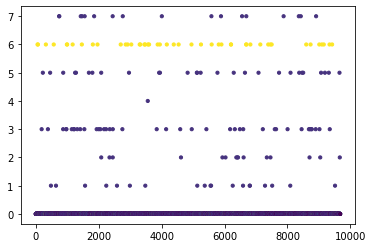

In [ ]:
# Возможно убрать эту ячейку?

plt.scatter(compare_list[0].index, compare_list[0]['labels_sem_2'], c=compare_list[0]['labels_sem_1'], s=10)